<a href="https://colab.research.google.com/github/NaveenPrabodha/CNN-for-MNIST-Handwritten-Digit-Classification/blob/main/ANN_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Develop a CNN for MNIST Handwritten Digit Classification**

In [6]:
# Importing the necessary libraries

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
# Loading the data and preprocess data

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

datagen = ImageDataGenerator(
    rotation_range=5,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
datagen.fit(x_train)


In [8]:
# Building CNN model

model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


375/375 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9809
Validation loss: 0.0670, Validation accuracy: 0.9809
313/313 [==============================] - 1s 3ms/step - loss: 0.0612 - accuracy: 0.9807
Test loss: 0.0612, Test accuracy: 0.9807
313/313 [==============================] - 1s 2ms/step


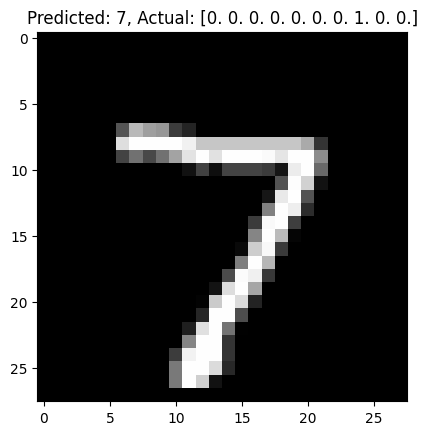

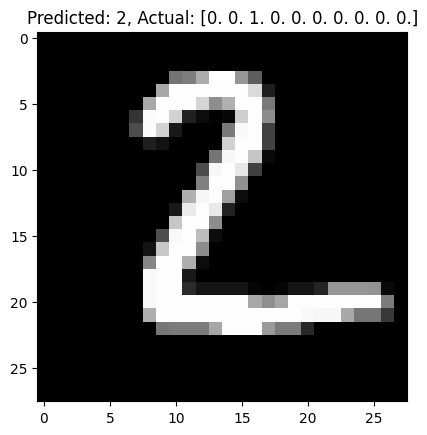

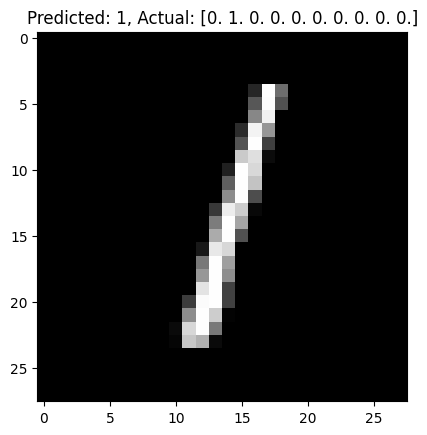

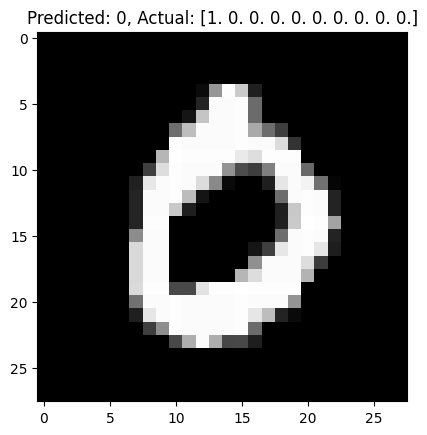

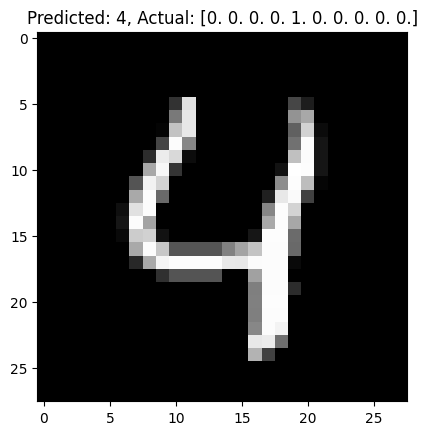

Epoch 1/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1039 - accuracy: 0.9687
Epoch 2/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0970 - accuracy: 0.9709
Epoch 3/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0909 - accuracy: 0.9727
Epoch 4/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0849 - accuracy: 0.9742
Epoch 5/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0819 - accuracy: 0.9754


In [10]:
# Evaluating your model on test set

loss, accuracy = model.evaluate(x_val, y_val)

print(f"Validation loss: {loss:.4f}, Validation accuracy: {accuracy:.4f}")

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

for i in range(5):
    plt.imshow(x_test[i], cmap="gray")
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {y_test[i]}")
    plt.show()

model.fit(datagen.flow(x_train, y_train), epochs=5)

**Optimized algorithm with batch normalization**

In [11]:
# Importing the necessary libraries
import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [12]:
# Loading the data and preprocess data
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

datagen = ImageDataGenerator(
    rotation_range=5,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
datagen.fit(x_train)

In [13]:
# Building CNN model with batch normalization
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),  # Add batch normalization
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),  # Add batch normalization
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),  # Add batch normalization
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(datagen.flow(x_train, y_train), epochs=5)

Epoch 1/5
1500/1500 [==============================] - 25s 15ms/step - loss: 0.3351 - accuracy: 0.8964
Epoch 2/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1659 - accuracy: 0.9488
Epoch 3/5
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1352 - accuracy: 0.9581
Epoch 4/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1192 - accuracy: 0.9630
Epoch 5/5
1500/1500 [==============================] - 23s 15ms/step - loss: 0.1049 - accuracy: 0.9677


375/375 [==============================] - 1s 2ms/step - loss: 0.0732 - accuracy: 0.9787
Validation loss: 0.0732, Validation accuracy: 0.9787
313/313 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0.9814
Test loss: 0.0631, Test accuracy: 0.9814
313/313 [==============================] - 1s 3ms/step


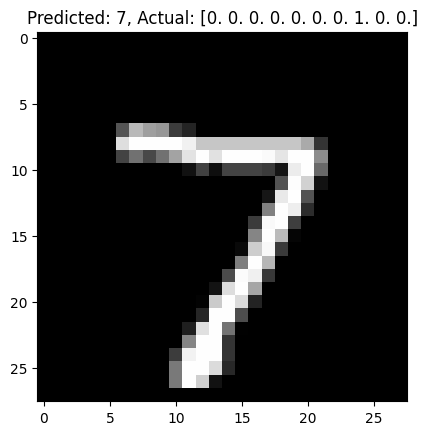

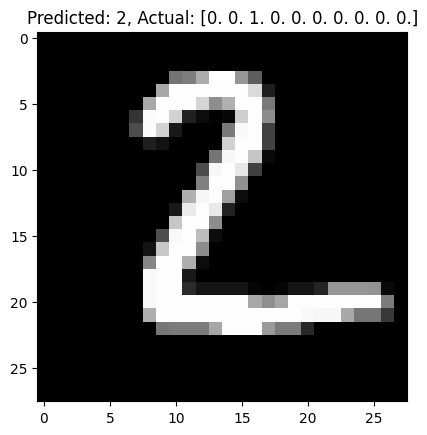

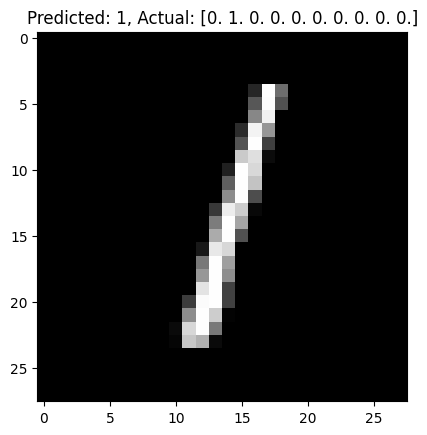

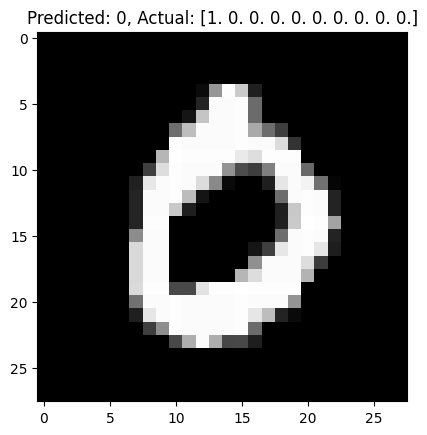

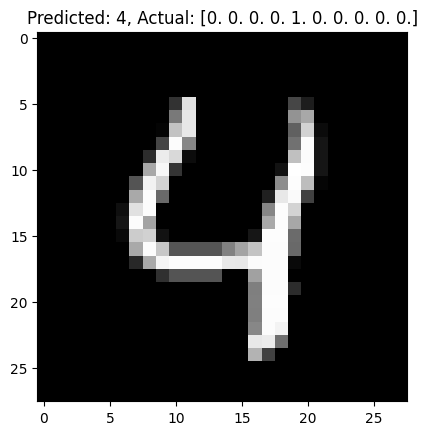

In [14]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation loss: {loss:.4f}, Validation accuracy: {accuracy:.4f}")

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

for i in range(5):
    plt.imshow(x_test[i], cmap="gray")
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {y_test[i]}")
    plt.show()